In [9]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import math

/Users/tuyenhuynh/Documents/Study/FinalProject/FinancialAssistant/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
symbol = 'FPT'
yearly = True
# balancesheet = requests.get(f'http://localhost/api/v1/scfa/balancesheet?symbols={symbol}&yearly={yearly}')
balancesheet = requests.get(f'https://app.finsc.vn/api/v1/scfa/balancesheet?symbols={symbol}&yearly={yearly}')
balancesheet = balancesheet.json()
df_balancesheet = pd.DataFrame(balancesheet['data'])
df_balancesheet.head()

,ticker,quarter,year,shortAsset,cash,shortInvest,shortReceivable,inventory,longAsset,fixedAsset,...,oweCentralBank,valuablePaper,payableInterest,receivableInterest,deposit,otherDebt,fund,unDistributedIncome,minorShareHolderProfit,payable
0,FPT,5,2024,45536,9315,21785,11382,1857,26464,14816,...,None,None,None,None,None,874,None,0.0,5933,36272
1,FPT,5,2023,36706,8279,16104,9674,1593,23577,13643,...,None,None,None,None,None,1015,None,0.0,4959,30350
2,FPT,5,2022,30938,6440,13047,8503,1966,20713,12033,...,None,None,None,None,None,569,None,0.0,4310,26294
3,FPT,5,2021,35118,5418,20731,6882,1507,18580,10399,...,None,None,None,None,None,555,None,0.0,3477,32280
4,FPT,5,2020,25266,4686,12436,6265,1290,16468,8318,...,None,None,None,None,None,745,None,0.0,2860,23129


In [11]:
cashflow = requests.get(f'https://app.finsc.vn/api/v1/scfa/cashflow?symbols={symbol}&yearly={yearly}')
cashflow = cashflow.json()
df_cashflow = pd.DataFrame(cashflow['data'])
df_cashflow.head()

,ticker,quarter,year,investCost,fromInvest,fromFinancial,fromSale,freeCashFlow
0,FPT,5,2024,-3275,-8462,-2198,11704,7223.0
1,FPT,5,2023,-3978,-6548,-1168,9517,4443.0
2,FPT,5,2022,-3215,5757,-9773,5054,6059.0
3,FPT,5,2021,-2911,-10413,5365,5840,2787.0
4,FPT,5,2020,-3018,-8144,3037,6340,901.0


In [12]:
incomestatement = requests.get(f'https://app.finsc.vn/api/v1/scfa/incomestatement?symbols={symbol}&yearly={yearly}')
incomestatement = incomestatement.json()
df_incomestatement = pd.DataFrame(incomestatement['data'])
df_incomestatement.head()

,ticker,quarter,year,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
0,FPT,5,2024,62849,0.194,None,-39150,23698,-13190,10508,...,9427,7857,0.215,None,None,None,None,None,None,13044
1,FPT,5,2023,52618,0.196,None,-32298,20320,-11868,8452,...,7788,6465,0.218,None,None,None,None,None,None,10738
2,FPT,5,2022,44010,0.234,None,-26842,17167,-10373,6795,...,6491,5310,0.224,None,None,None,None,None,None,8628
3,FPT,5,2021,35657,0.195,None,-22025,13632,-8217,5415,...,5349,4337,0.226,None,None,None,None,None,None,7059
4,FPT,5,2020,29830,0.076,None,-18017,11814,-7209,4605,...,4424,3538,0.128,None,None,None,None,None,None,6095


In [13]:
financialratio = requests.get(f'https://app.finsc.vn/api/v1/scfa/financialratio?symbols={symbol}&yearly={yearly}')
financialratio = financialratio.json()
df_financialratio = pd.DataFrame(financialratio['data'])
df_financialratio.head()

,ticker,quarter,year,priceToEarning,priceToBook,valueBeforeEbitda,dividend,roe,roa,daysReceivable,...,loanOnAsset,loanOnDeposit,depositOnEarnAsset,badDebtOnAsset,liquidityOnLiability,payableOnEquity,cancelDebt,ebitdaOnStockChange,bookValuePerShareChange,creditGrowth
0,FPT,5,2024,28.5,7.5,13.4,0.015,0.287,0.119,52,...,None,None,None,None,None,1.0,None,0.049,0.193,None
1,FPT,5,2023,18.7,4.8,14.6,0.028,0.281,0.116,47,...,None,None,None,None,None,1.0,None,0.054,0.187,None
2,FPT,5,2022,15.5,3.9,12.3,0.041,0.272,0.101,49,...,None,None,None,None,None,1.0,None,0.031,0.173,None
3,FPT,5,2021,18.7,4.5,16.5,0.042,0.258,0.091,42,...,None,None,None,None,None,1.5,None,0.001,0.139,None
4,FPT,5,2020,12.4,2.8,12.4,0.077,0.238,0.094,35,...,None,None,None,None,None,1.2,None,-0.021,-0.399,None


In [14]:
# Basic analytics for df_balancesheet
print("Shape:", df_balancesheet.shape)
print("\nColumns:", df_balancesheet.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_balancesheet.describe())
print("\nMissing values per column:")
print(df_balancesheet.isnull().sum())

Shape: (23, 37)

Columns: ['ticker', 'quarter', 'year', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable']

Describe (numeric columns):
       quarter        year    shortAsset         cash   shortInvest  \
count     23.0    23.00000     23.000000    23.000000     23.000000   
mean       5.0  2013.00000  15331.826087  3236.086957   4888.173913   
std        0.0     6.78233  12638.024909  2579.581906   6938.426804   
min        5.0  2002.00000    510.000000    80.000000      0.000000   
25%        5.0  2007.50000   4500.500000  1069.5000

In [15]:
# Basic analytics for df_cashflow
print("Cashflow Shape:", df_cashflow.shape)
print("\nColumns:", df_cashflow.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_cashflow.describe())
print("\nMissing values per column:")
print(df_cashflow.isnull().sum())

Cashflow Shape: (23, 8)

Columns: ['ticker', 'quarter', 'year', 'investCost', 'fromInvest', 'fromFinancial', 'fromSale', 'freeCashFlow']

Describe (numeric columns):
       quarter        year  investCost    fromInvest  fromFinancial  \
count     23.0    23.00000    23.00000     23.000000      23.000000   
mean       5.0  2013.00000 -1462.73913  -2236.608696     -99.478261   
std        0.0     6.78233  1266.40914   3482.486099    2722.961070   
min        5.0  2002.00000 -3978.00000 -10413.000000   -9773.000000   
25%        5.0  2007.50000 -2682.50000  -3299.000000    -500.500000   
50%        5.0  2013.00000  -920.00000  -1479.000000     276.000000   
75%        5.0  2018.50000  -476.00000   -196.000000     580.500000   
max        5.0  2024.00000   -22.00000   5757.000000    5365.000000   

           fromSale  freeCashFlow  
count     23.000000     16.000000  
mean    2742.130435   2580.062500  
std     3176.614125   1973.282391  
min     -291.000000    385.000000  
25%      504.5

In [16]:
# Basic analytics for df_incomestatement
print("Incomestatement Shape:", df_incomestatement.shape)
print("\nColumns:", df_incomestatement.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_incomestatement.describe())
print("\nMissing values per column:")
print(df_incomestatement.isnull().sum())

Incomestatement Shape: (23, 24)

Columns: ['ticker', 'quarter', 'year', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']

Describe (numeric columns):
       quarter        year       revenue  yearRevenueGrowth  costOfGoodSold  \
count     23.0    23.00000     23.000000          22.000000       23.000000   
mean       5.0  2013.00000  27125.347826           0.249591   -19782.043478   
std        0.0     6.78233  15093.048149           0.452691     9552.846004   
min        5.0  2002.00000   1515.000000          -0.456000   -39150.000000   
25%        5.0  2007.50000  17393.000000           0.081250   -26649.000000   
5

In [17]:
# Basic analytics for df_financialratio
print("Financial Ratio Shape:", df_financialratio.shape)
print("\nColumns:", df_financialratio.columns.tolist())
# print("\nInfo:")
# df_balancesheet.info()
print("\nDescribe (numeric columns):")
print(df_financialratio.describe())
print("\nMissing values per column:")
print(df_financialratio.isnull().sum())

Financial Ratio Shape: (21, 59)

Columns: ['ticker', 'quarter', 'year', 'priceToEarning', 'priceToBook', 'valueBeforeEbitda', 'dividend', 'roe', 'roa', 'daysReceivable', 'daysInventory', 'daysPayable', 'ebitOnInterest', 'earningPerShare', 'bookValuePerShare', 'interestMargin', 'nonInterestOnToi', 'badDebtPercentage', 'provisionOnBadDebt', 'costOfFinancing', 'equityOnTotalAsset', 'equityOnLoan', 'costToIncome', 'equityOnLiability', 'currentPayment', 'quickPayment', 'epsChange', 'ebitdaOnStock', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset', 'debtOnEbitda', 'shortOnLongDebt', 'assetOnEquity', 'capitalBalance', 'cashOnEquity', 'cashOnCapitalize', 'cashCirculation', 'revenueOnWorkCapital', 'capexOnFixedAsset', 'revenueOnAsset', 'postTaxOnPreTax', 'ebitOnRevenue', 'preTaxOnEbit', 'preProvisionOnToi', 'postTaxOnToi', 'loanOnEarnAsset', 'loanOnAsset', 'loanOnDeposit', 'depositOnEarnAsset', 'badDebtOnAsset', 'liquidityOnLiability', 'payableOnEquit

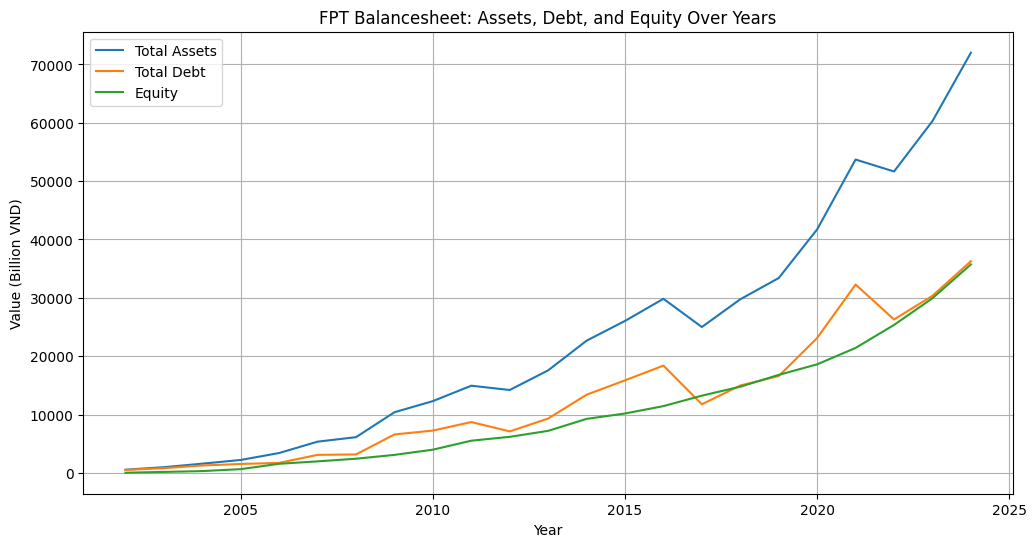

In [18]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Total Assets')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['debt'], label='Total Debt')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['equity'], label='Equity')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Assets, Debt, and Equity Over Years')
ax.legend()
plt.grid(True)
plt.show()

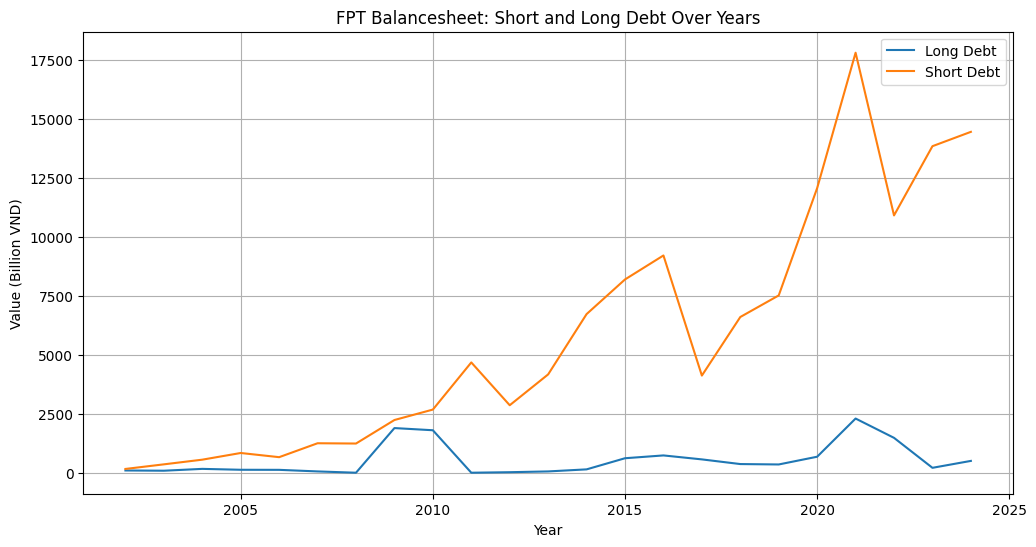

In [19]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['longDebt'], label='Long Debt')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['shortDebt'], label='Short Debt')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Short and Long Debt Over Years')
ax.legend()
plt.grid(True)
plt.show()

Gộp nợ và khả năng trả nợ

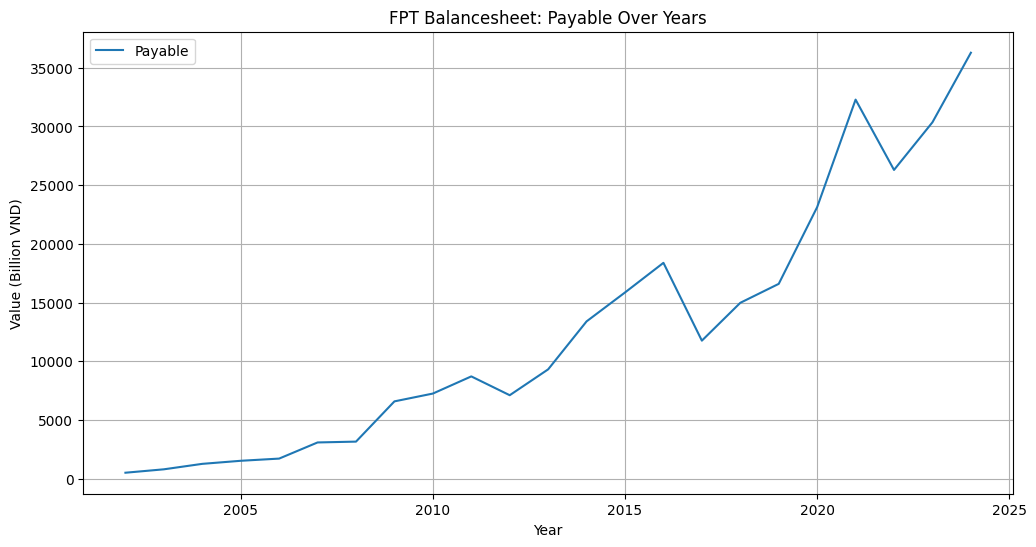

In [20]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['payable'], label='Payable')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Payable Over Years')
ax.legend()
plt.grid(True)
plt.show()

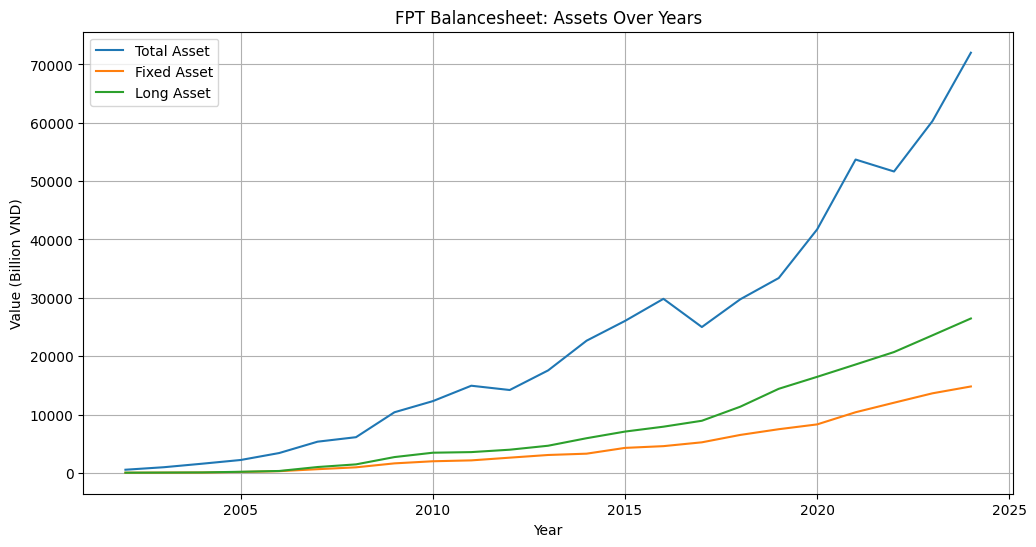

In [21]:
# Visualize key balancesheet metrics over the years
fig, ax = plt.subplots(figsize=(12, 6))
df_balancesheet_sorted = df_balancesheet.sort_values('year')

ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Total Asset')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['fixedAsset'], label='Fixed Asset')
ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['longAsset'], label='Long Asset')

ax.set_xlabel('Year')
ax.set_ylabel('Value (Billion VND)')
ax.set_title(f'{symbol} Balancesheet: Assets Over Years')
ax.legend()
plt.grid(True)
plt.show()


Columns: ['ticker', 'quarter', 'year', 'investCost', 'fromInvest', 'fromFinancial', 'fromSale', 'freeCashFlow']


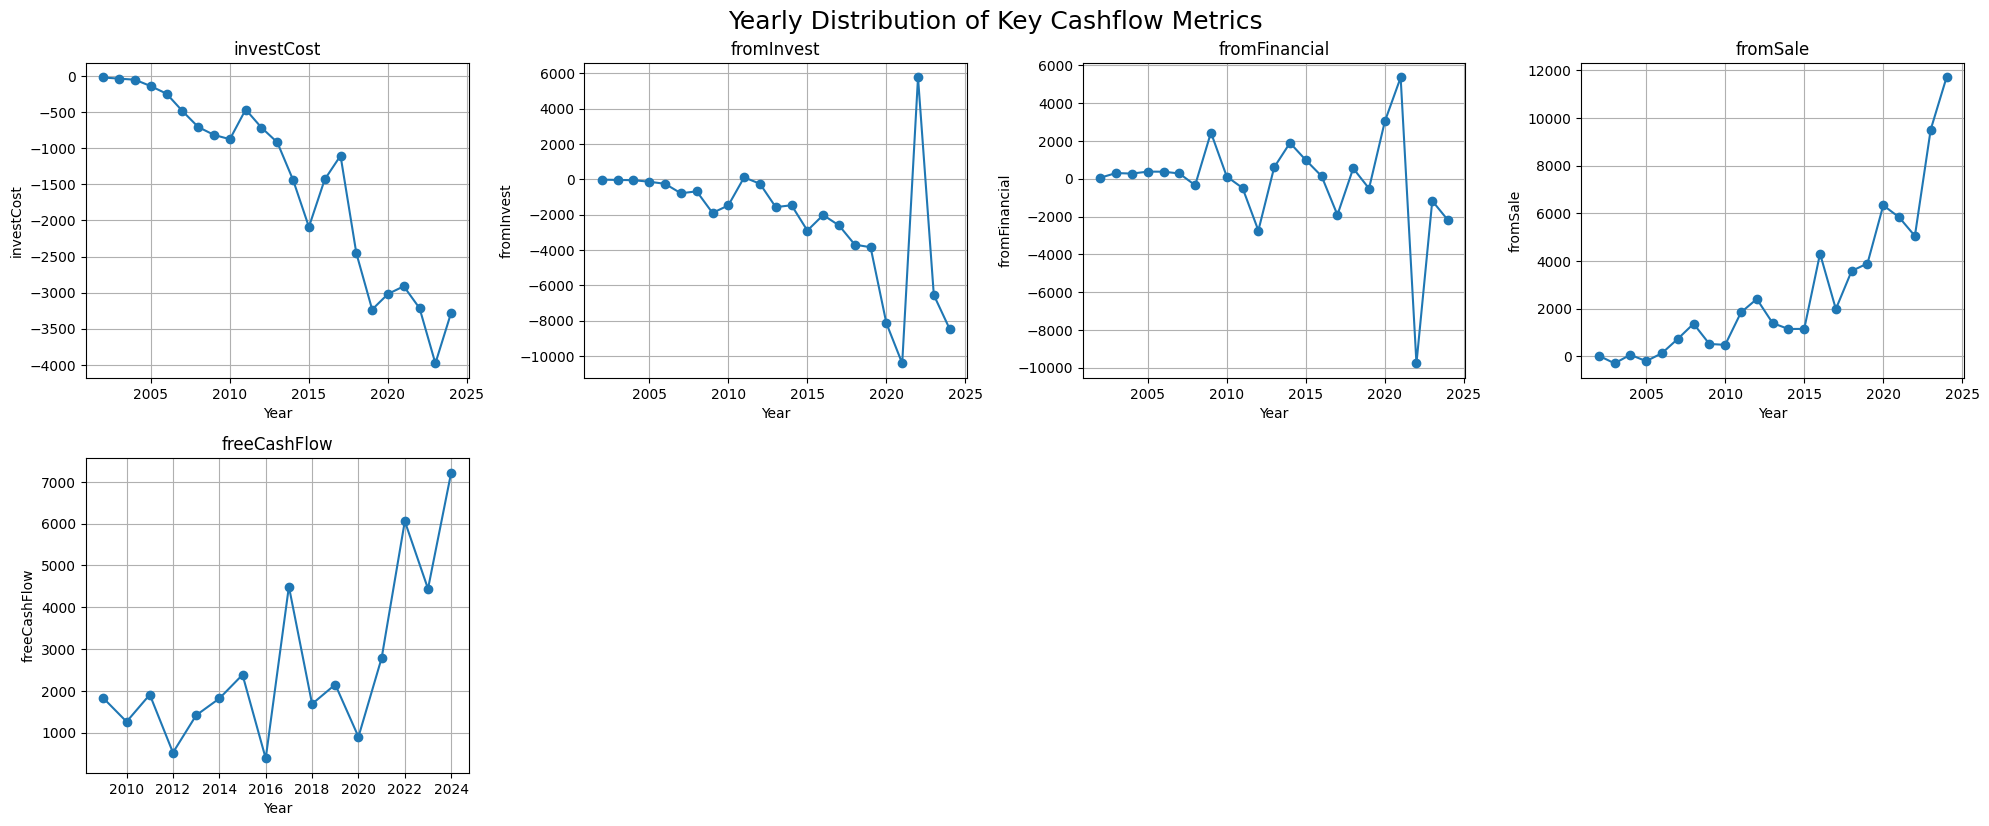

In [22]:
print("\nColumns:", df_cashflow.columns.tolist())
cashflow_numerics_columns = [
    "investCost",
    "fromInvest",
    "fromFinancial",
    "fromSale",
    "freeCashFlow"
]

# Plot distribution by year for each numeric column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()

df_cashflow = df_cashflow.sort_values('year')

for i, col in enumerate(cashflow_numerics_columns):
    ax = axes[i]
    ax.plot(df_cashflow['year'], df_cashflow[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(len(cashflow_numerics_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Cashflow Metrics', fontsize=18)
plt.show()


Columns: ['ticker', 'quarter', 'year', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']


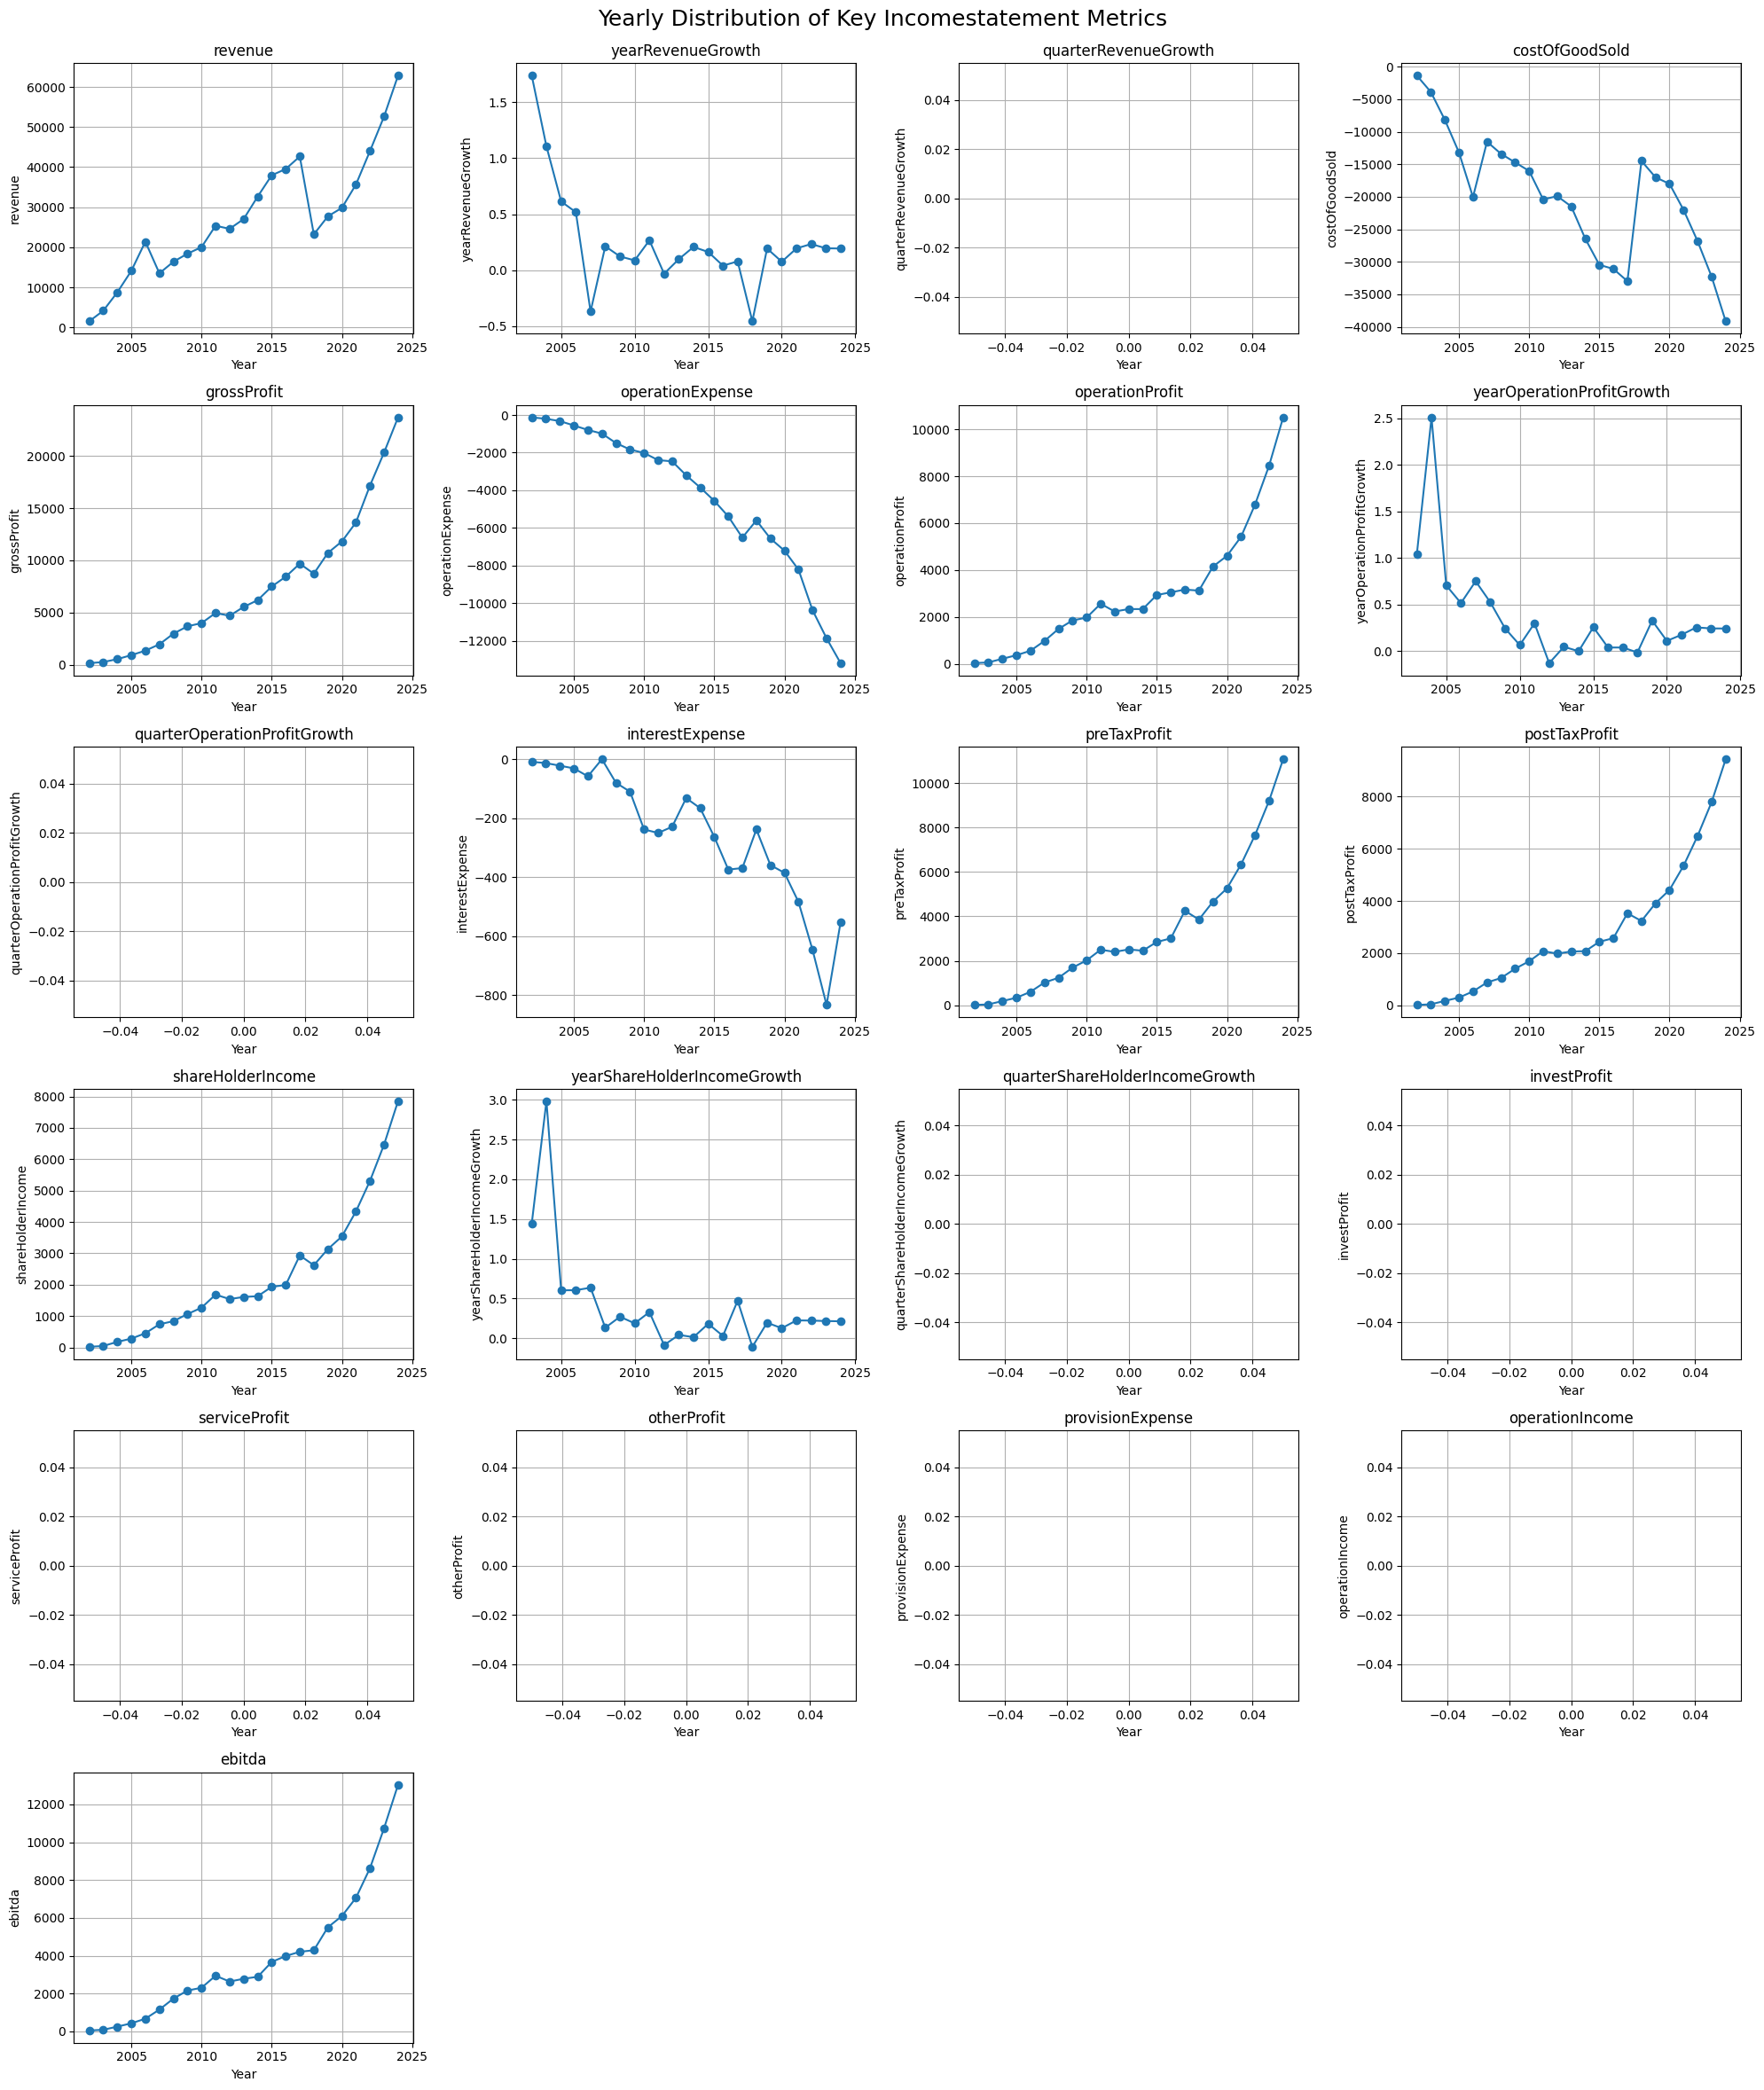

In [23]:
print("\nColumns:", df_incomestatement.columns.tolist())
incomestatement_numerics_columns = [
    "revenue",
    "yearRevenueGrowth",
    "quarterRevenueGrowth",
    "costOfGoodSold",
    "grossProfit",
    "operationExpense",
    "operationProfit",
    "yearOperationProfitGrowth",
    "quarterOperationProfitGrowth",
    "interestExpense",
    "preTaxProfit",
    'postTaxProfit',
    'shareHolderIncome', 
    'yearShareHolderIncomeGrowth', 
    'quarterShareHolderIncomeGrowth', 
    'investProfit', 
    'serviceProfit', 
    'otherProfit', 
    'provisionExpense', 
    'operationIncome', 
    'ebitda'
]

# Dynamically determine grid size
num_plots = len(incomestatement_numerics_columns)
ncols = 4
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

df_incomestatement_sorted = df_incomestatement.sort_values('year')

for i, col in enumerate(incomestatement_numerics_columns):
    ax = axes[i]
    ax.plot(df_incomestatement_sorted['year'], df_incomestatement_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Incomestatement Metrics', fontsize=18)
plt.show()

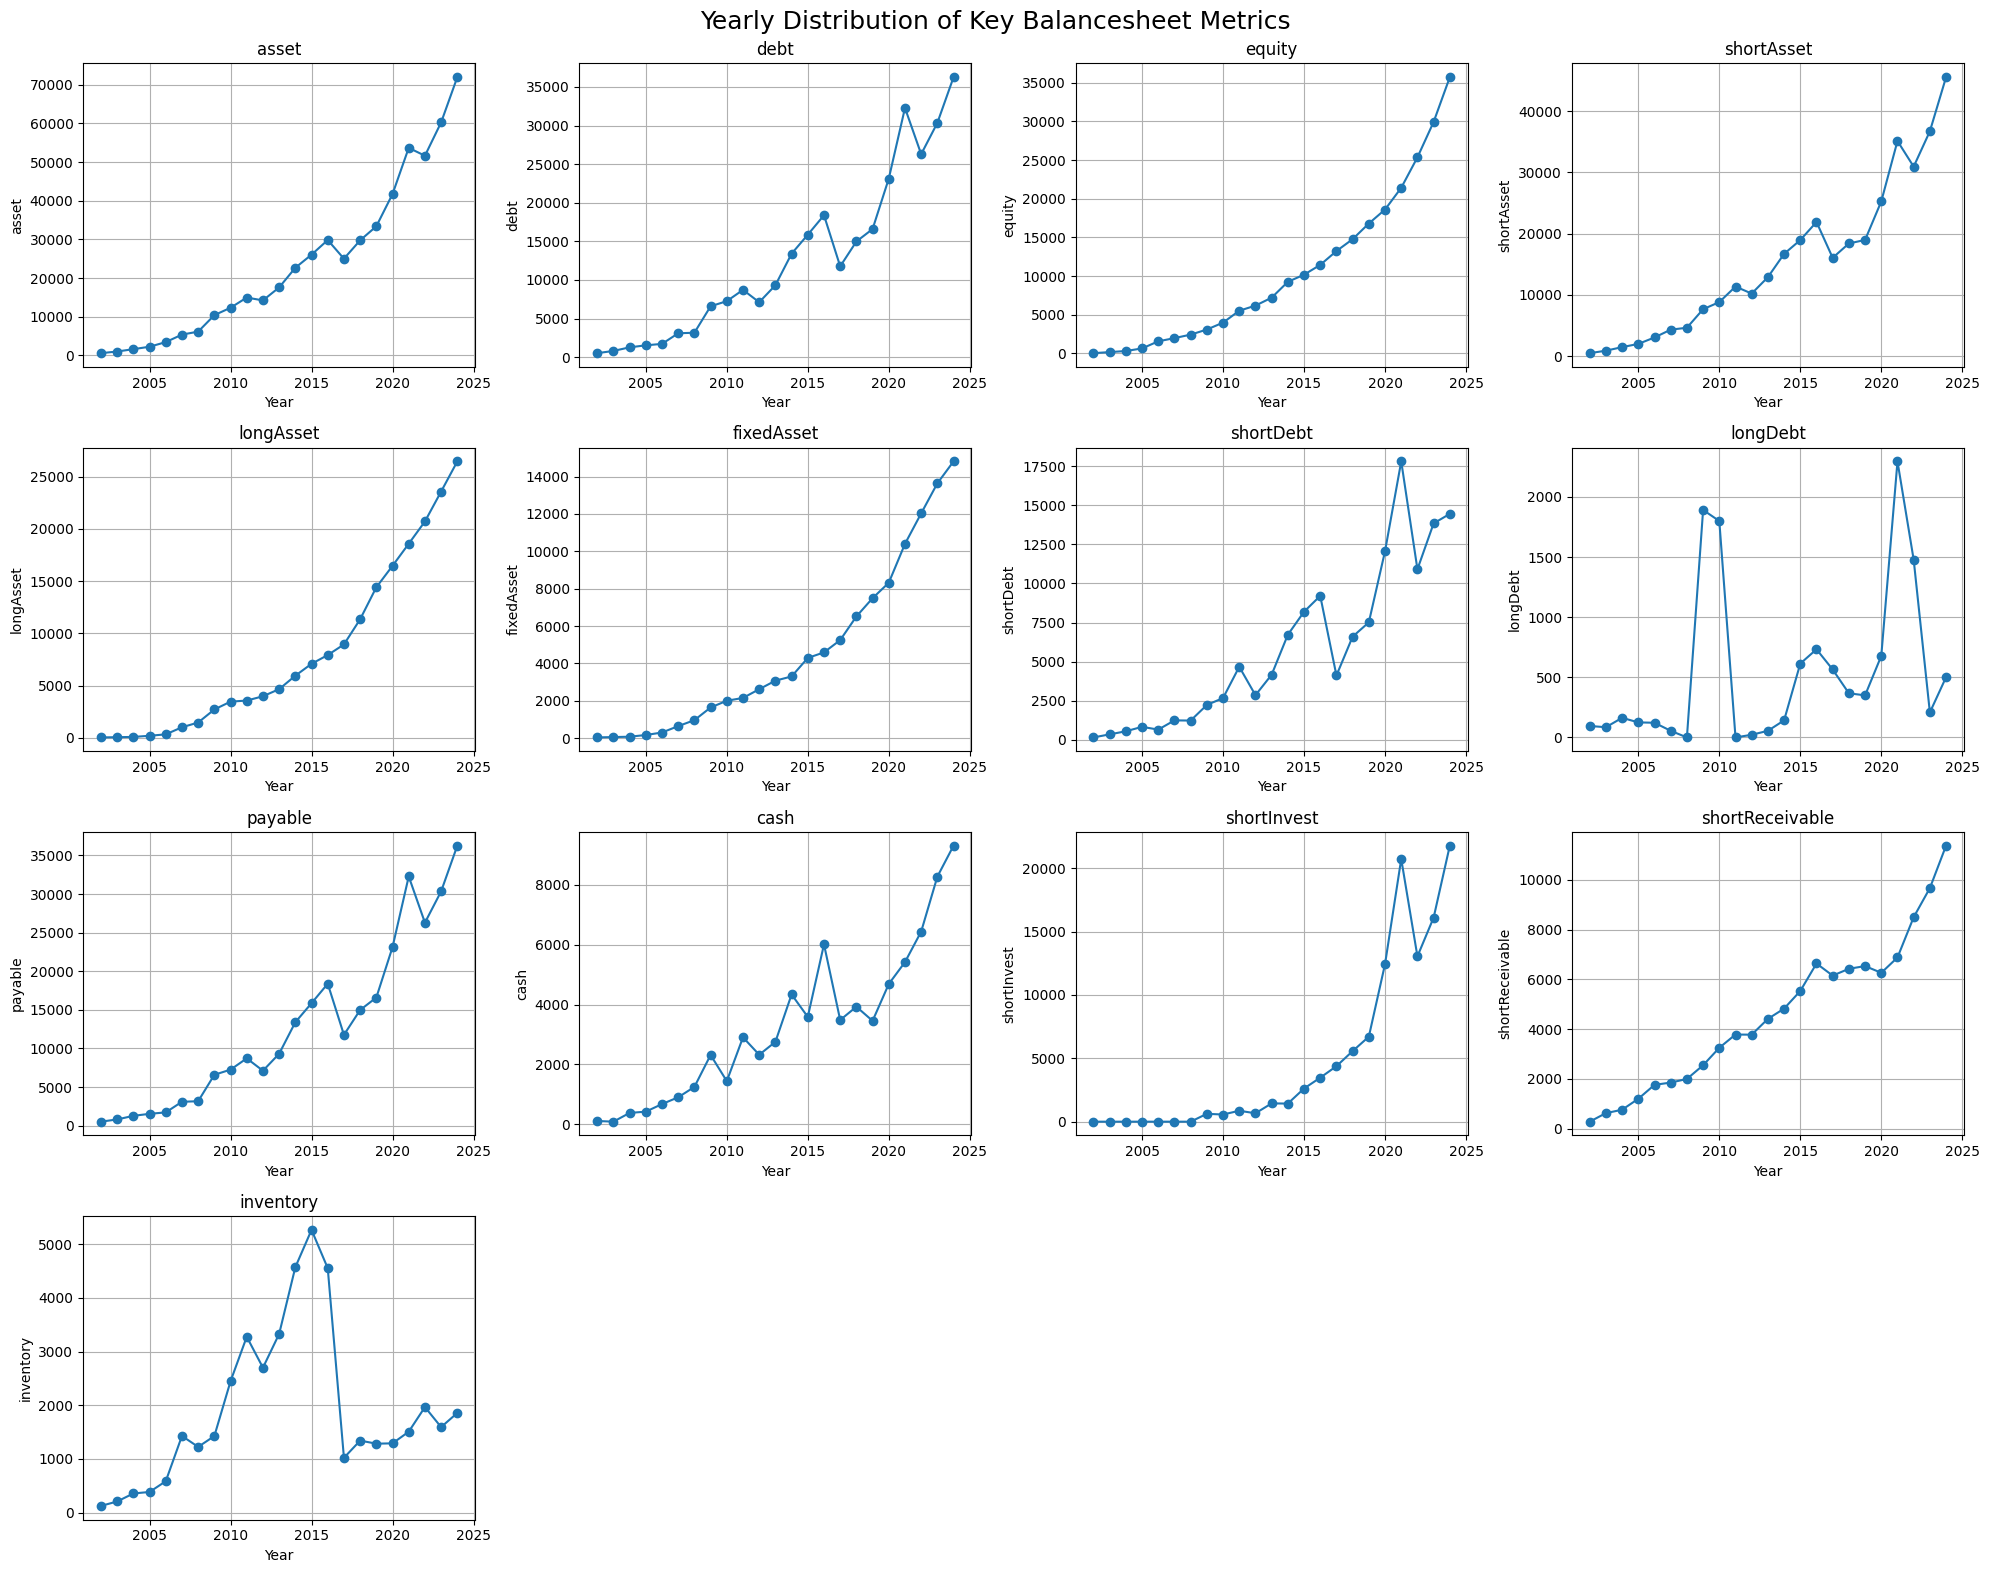

In [24]:
# Plot histograms for key numeric columns in df_balancesheet
numeric_cols = ['asset', 'debt', 'equity', 'shortAsset', 'longAsset', 'fixedAsset', 'shortDebt', 'longDebt', 'payable', 'cash', 'shortInvest', 'shortReceivable', 'inventory']

# Plot distribution by year for each numeric column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()

df_balancesheet_sorted = df_balancesheet.sort_values('year')

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.plot(df_balancesheet_sorted['year'], df_balancesheet_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Balancesheet Metrics', fontsize=18)
plt.show()

Lợi nhuận của cty và cổ phiếu công ty xem xét tương thích

lợi nhuận tăng, cổ phiếu giảm
lợi nhuận giảm, cổ phiếu tăng
increase, increase
decrease, decrease

check relationship between columns.

['priceToEarning', 'priceToBook', 'valueBeforeEbitda', 'dividend', 'roe', 'roa', 'daysReceivable', 'daysInventory', 'daysPayable', 'ebitOnInterest', 'earningPerShare', 'bookValuePerShare', 'interestMargin', 'nonInterestOnToi', 'badDebtPercentage', 'provisionOnBadDebt', 'costOfFinancing', 'equityOnTotalAsset', 'equityOnLoan', 'costToIncome', 'equityOnLiability', 'currentPayment', 'quickPayment', 'epsChange', 'ebitdaOnStock', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset', 'debtOnEbitda', 'shortOnLongDebt', 'assetOnEquity', 'capitalBalance', 'cashOnEquity', 'cashOnCapitalize', 'cashCirculation', 'revenueOnWorkCapital', 'capexOnFixedAsset', 'revenueOnAsset', 'postTaxOnPreTax', 'ebitOnRevenue', 'preTaxOnEbit', 'preProvisionOnToi', 'postTaxOnToi', 'loanOnEarnAsset', 'loanOnAsset', 'loanOnDeposit', 'depositOnEarnAsset', 'badDebtOnAsset', 'liquidityOnLiability', 'payableOnEquity', 'cancelDebt', 'ebitdaOnStockChange', 'bookValuePerShareChange', 'cr

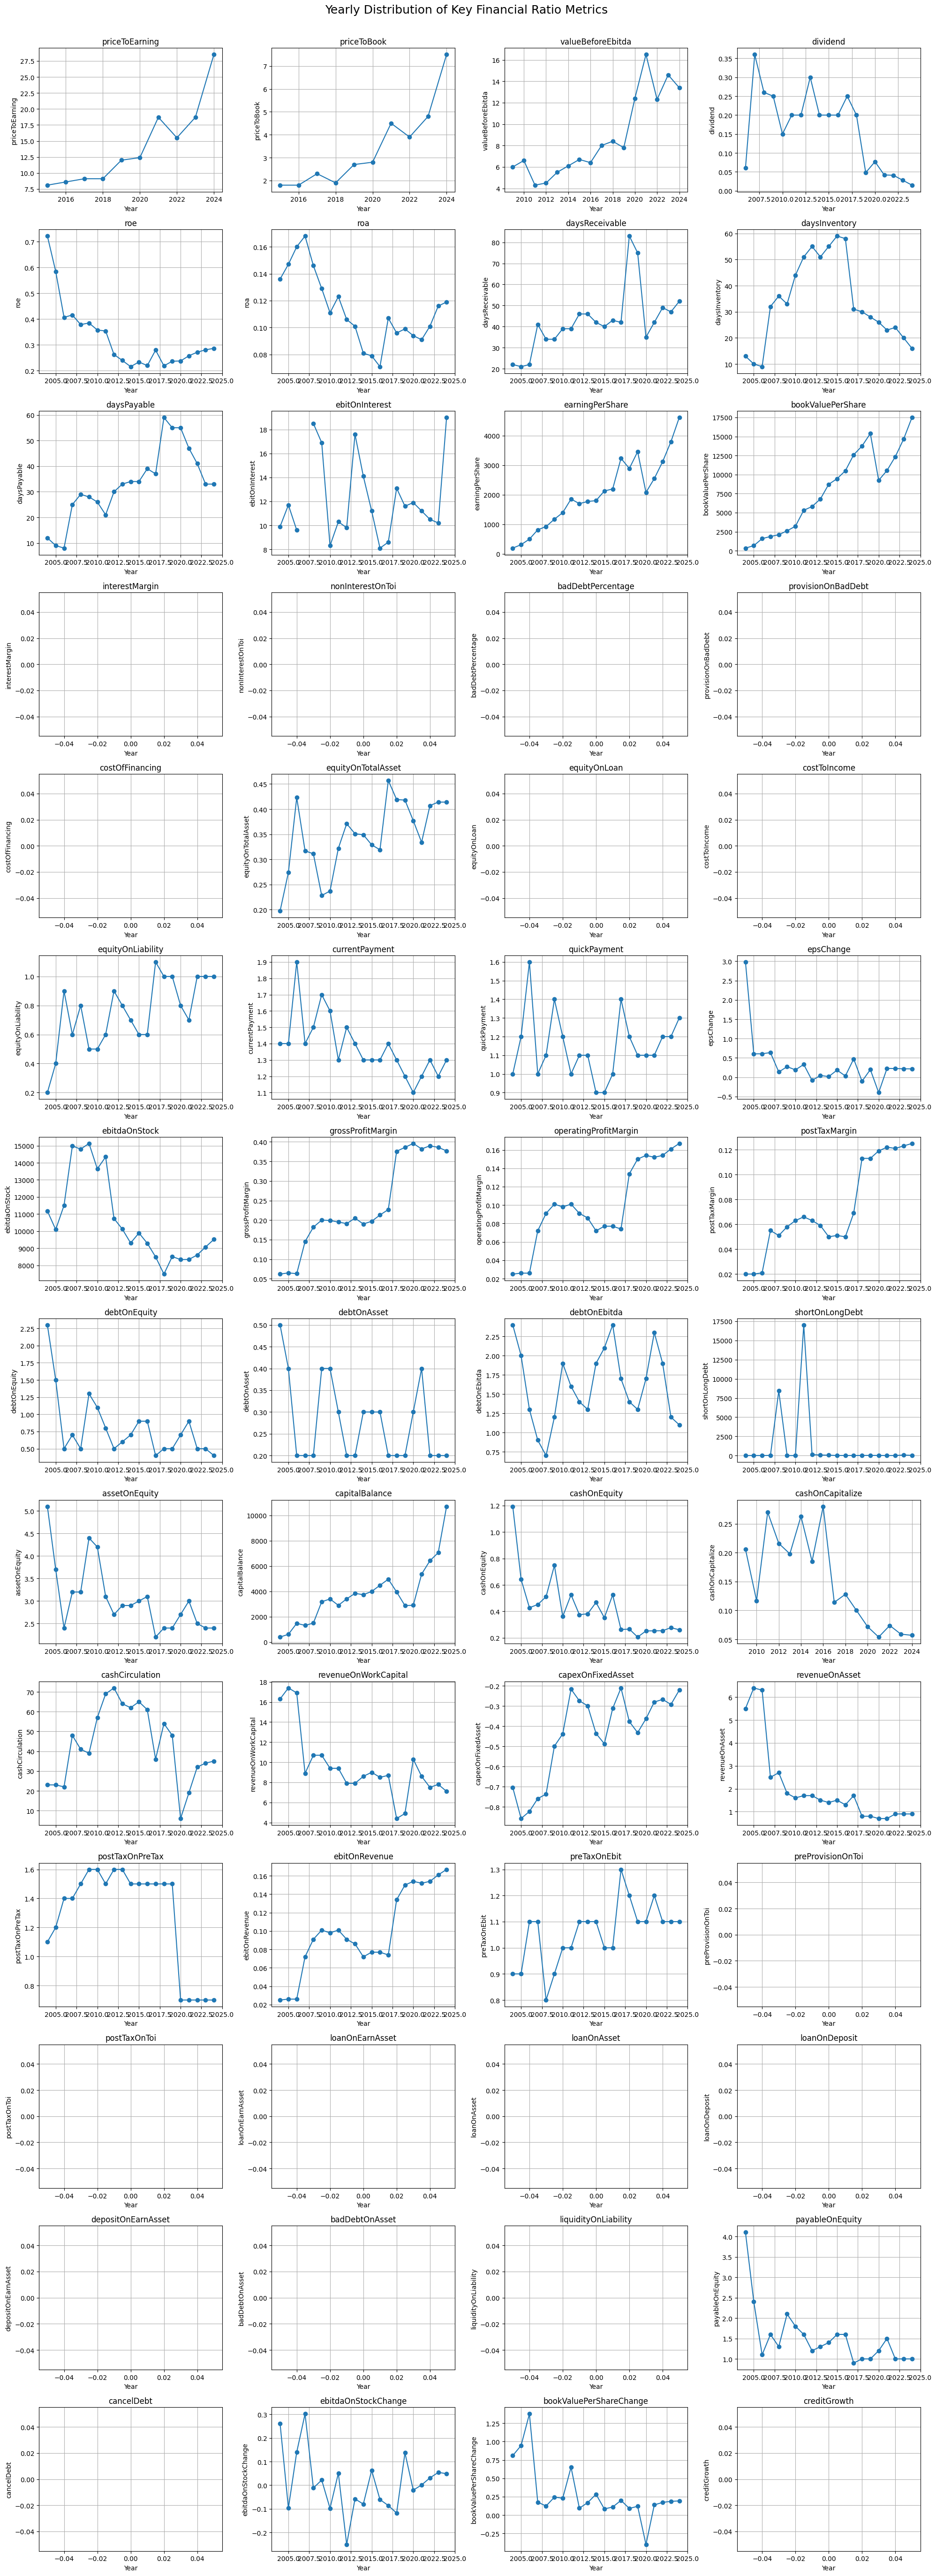

In [25]:
df_financialratio.head()
financialratio_numerics_cols = df_financialratio.columns.tolist()[3:]  # Exclude 'symbol', 'year', 'quarter'
print(financialratio_numerics_cols)

# Dynamically determine grid size
num_plots = len(financialratio_numerics_cols)
ncols = 4
nrows = math.ceil(num_plots / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

df_financialratio_sorted = df_financialratio.sort_values('year')

for i, col in enumerate(financialratio_numerics_cols):
    ax = axes[i]
    ax.plot(df_financialratio_sorted['year'], df_financialratio_sorted[col], marker='o')
    ax.set_title(col)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Yearly Distribution of Key Financial Ratio Metrics', fontsize=18)
plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'statsmodels'

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the time series data for 'asset'
df_balancesheet_sorted = df_balancesheet.sort_values('year')
asset_series = df_balancesheet_sorted.set_index('year')['asset']

# Fit ARIMA model (order can be tuned as needed, here using (1,1,1) as example)
model = ARIMA(asset_series, order=(1, 1, 1))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Plot actual vs fitted values
plt.figure(figsize=(10, 5))
plt.plot(asset_series, label='Actual Asset')
plt.plot(asset_series.index, model_fit.fittedvalues, label='Fitted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Asset')
plt.title(f'{symbol} Asset - ARIMA Model Fit')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [28]:
# Explore insights from the above visualizations

# 1. Balancesheet trends
print("Asset, Debt, and Equity trends (first and last year):")
print(df_balancesheet_sorted[['year', 'asset', 'debt', 'equity']].iloc[[0, -1]])

# 2. Cashflow trends
print("\nFree Cash Flow trend (first and last year):")
print(df_cashflow[['year', 'freeCashFlow']].sort_values('year').iloc[[0, -1]])

# 3. Incomestatement trends
print("\nRevenue and Net Profit trend (first and last year):")
print(df_incomestatement[['year', 'revenue', 'postTaxProfit']].sort_values('year').iloc[[0, -1]])

# 4. Financial ratios (example: ROE, ROA if available)
for col in ['roe', 'roa']:
    if col in df_financialratio.columns:
        print(f"\n{col.upper()} trend (first and last year):")
        print(df_financialratio[['year', col]].sort_values('year').iloc[[0, -1]])

# 5. Correlation between key metrics
print("\nCorrelation between Asset, Debt, and Equity:")
print(df_balancesheet[['asset', 'debt', 'equity']].corr())

print("\nCorrelation between Revenue and Post Tax Profit:")
print(df_incomestatement[['revenue', 'postTaxProfit']].corr())

Asset, Debt, and Equity trends (first and last year):
    year  asset   debt  equity
22  2002    550    517      33
0   2024  72000  36272   35728

Free Cash Flow trend (first and last year):
    year  freeCashFlow
22  2002           NaN
0   2024        7223.0

Revenue and Net Profit trend (first and last year):
    year  revenue  postTaxProfit
22  2002     1515             18
0   2024    62849           9427

ROE trend (first and last year):
    year    roe
20  2004  0.722
0   2024  0.287

ROA trend (first and last year):
    year    roa
20  2004  0.136
0   2024  0.119

Correlation between Asset, Debt, and Equity:
           asset      debt    equity
asset   1.000000  0.992238  0.990722
debt    0.992238  1.000000  0.966705
equity  0.990722  0.966705  1.000000

Correlation between Revenue and Post Tax Profit:
                revenue  postTaxProfit
revenue        1.000000       0.895706
postTaxProfit  0.895706       1.000000


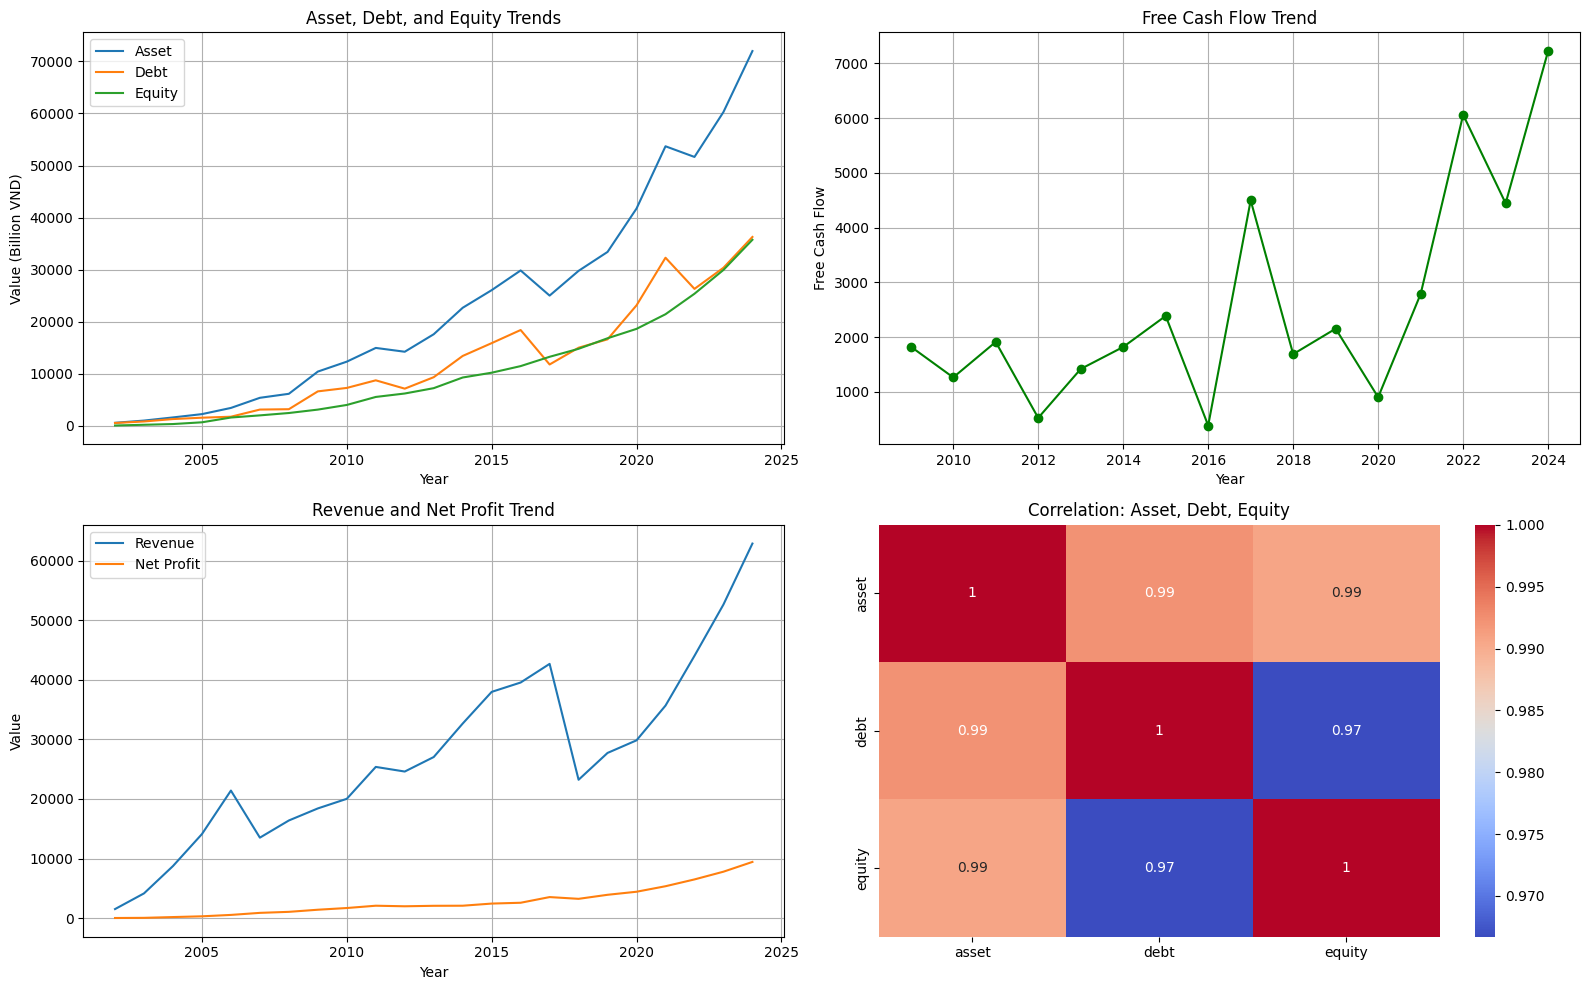

In [29]:
import seaborn as sns

# Visualize the trends and correlations explored above

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Asset, Debt, Equity trends
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['asset'], label='Asset')
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['debt'], label='Debt')
axes[0, 0].plot(df_balancesheet_sorted['year'], df_balancesheet_sorted['equity'], label='Equity')
axes[0, 0].set_title('Asset, Debt, and Equity Trends')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Value (Billion VND)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Free Cash Flow trend
axes[0, 1].plot(df_cashflow['year'], df_cashflow['freeCashFlow'], marker='o', color='green')
axes[0, 1].set_title('Free Cash Flow Trend')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Free Cash Flow')
axes[0, 1].grid(True)

# 3. Revenue and Net Profit trend
axes[1, 0].plot(df_incomestatement['year'], df_incomestatement['revenue'], label='Revenue')
axes[1, 0].plot(df_incomestatement['year'], df_incomestatement['postTaxProfit'], label='Net Profit')
axes[1, 0].set_title('Revenue and Net Profit Trend')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Correlation heatmap between Asset, Debt, Equity
corr_matrix = df_balancesheet[['asset', 'debt', 'equity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation: Asset, Debt, Equity')

plt.tight_layout()
plt.show()

The above visualization provides a comprehensive overview of the company's financial health and performance over time:

**Asset, Debt, and Equity Trends:**  
    This plot shows how the company's total assets, debts, and equity have evolved year by year. It helps identify growth patterns, leverage, and capital structure changes.

**Free Cash Flow Trend:**  
    This chart tracks the free cash flow, indicating the company's ability to generate cash after accounting for capital expenditures. Positive and growing free cash flow is a sign of financial strength.

**Revenue and Net Profit Trend:**  
    This subplot compares revenue and net profit over the years, highlighting profitability and operational efficiency. Divergence between the two may indicate changes in costs or margins.

**Correlation Heatmap (Asset, Debt, Equity):**  
    The heatmap visualizes the correlation between assets, debts, and equity. Strong correlations can reveal how these metrics move together, providing insights into the company's financial structure and risk.

Together, these visualizations help in understanding the company's financial trajectory, operational performance, and the relationships between key financial metrics.

- study thêm các chỉ số trong 4 bộ data ảnh hưởng đến nhau như thế nào.
- nếu các chỉ số ảnh hưởng đến doanh thu hay tình hình tài chính chung, xây thử 1 model dự đoán: linear or polynomial regression."

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Merge key columns from all 4 dataframes on 'year'
df_merged = df_balancesheet[['year', 'asset', 'debt', 'equity']].merge(
    df_cashflow[['year', 'freeCashFlow']], on='year', how='inner'
).merge(
    df_incomestatement[['year', 'revenue', 'postTaxProfit']], on='year', how='inner'
).merge(
    df_financialratio[['year', 'roe', 'roa']], on='year', how='inner'
)

# Correlation matrix to study relationships
print("Correlation matrix of merged features:")
print(df_merged.corr())

# Predict 'revenue' using other features (linear regression)
features = ['asset', 'debt', 'equity', 'freeCashFlow', 'postTaxProfit', 'roe', 'roa']
X = df_merged[features]
y = df_merged['revenue']

# Drop rows with NaN in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
print("\nLinear Regression R^2 score:", lr.score(X_test, y_test))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression (deg=2) R^2 score:", lr_poly.score(X_test_poly, y_test_poly))

Correlation matrix of merged features:
                   year     asset      debt    equity  freeCashFlow   revenue  \
year           1.000000  0.956476  0.945101  0.949056      0.668338  0.861121   
asset          0.956476  1.000000  0.991199  0.989904      0.730815  0.886693   
debt           0.945101  0.991199  1.000000  0.962998      0.658039  0.867173   
equity         0.949056  0.989904  0.962998  1.000000      0.781038  0.889786   
freeCashFlow   0.668338  0.730815  0.658039  0.781038      1.000000  0.807188   
revenue        0.861121  0.886693  0.867173  0.889786      0.807188  1.000000   
postTaxProfit  0.921366  0.978561  0.946883  0.990772      0.827391  0.892292   
roe           -0.735584 -0.569227 -0.581000 -0.536898      0.119299 -0.602137   
roa           -0.644992 -0.501687 -0.550910 -0.438137      0.342189 -0.502754   

               postTaxProfit       roe       roa  
year                0.921366 -0.735584 -0.644992  
asset               0.978561 -0.569227 -0.501687

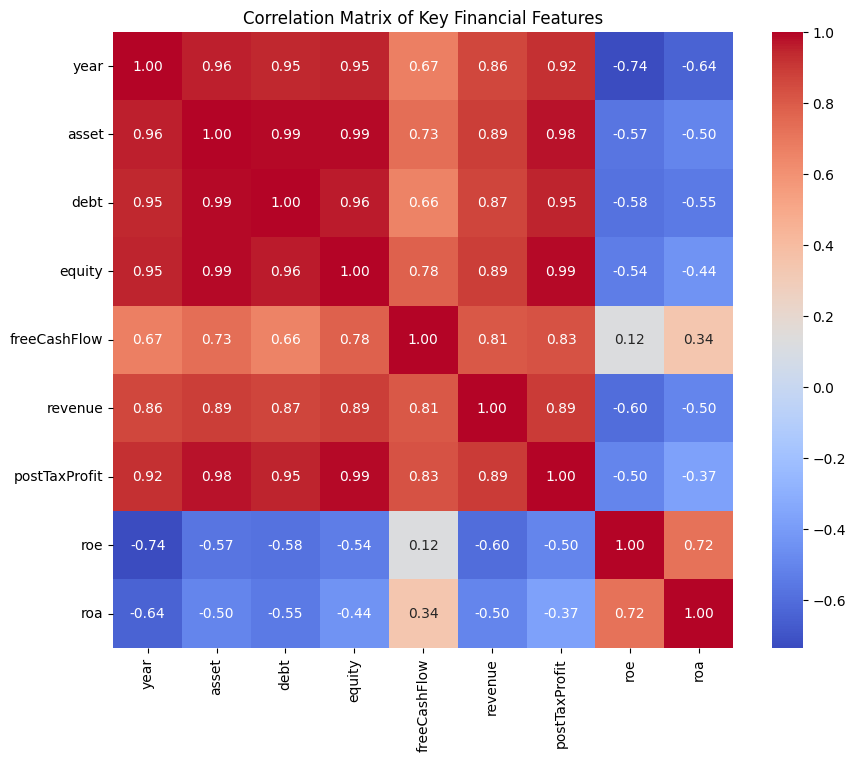

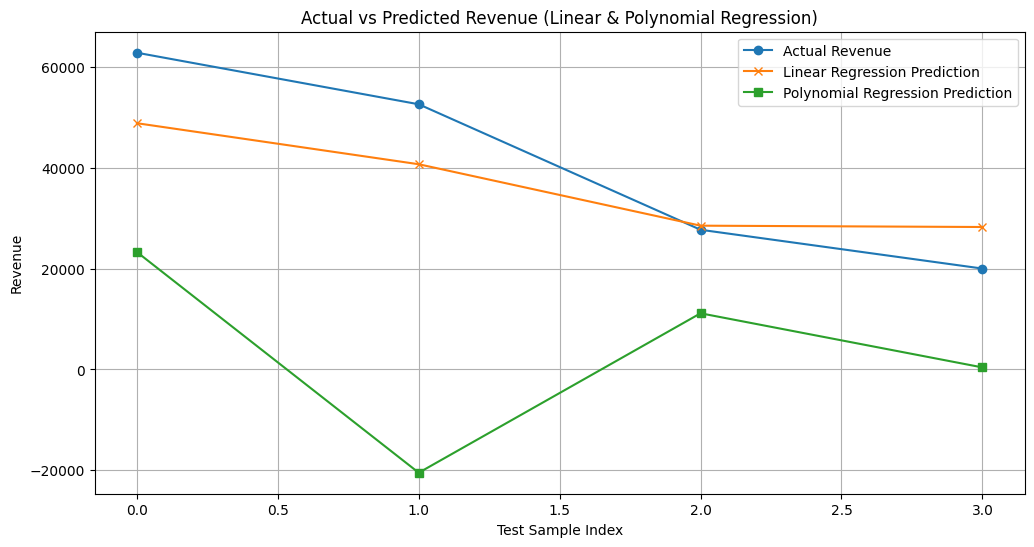

In [32]:
import seaborn as sns

# Visualize correlation matrix of merged features
plt.figure(figsize=(10, 8))
corr = df_merged.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Financial Features")
plt.show()

# Visualize actual vs predicted revenue for Linear and Polynomial Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Revenue', marker='o')
plt.plot(y_pred_linear, label='Linear Regression Prediction', marker='x')
plt.plot(y_pred_poly, label='Polynomial Regression Prediction', marker='s')
plt.xlabel('Test Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue (Linear & Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

## Exploring Relationships Between Financial Indicators

## Correlation Analysis:
Use a correlation matrix to examine the relationships between key indicators from the four datasets (`balancesheet`, `financialratio`, `incomestatement`, `cashflow`). This helps identify which metrics are strongly related, especially those linked to revenue, profit, assets, debt, ROE, ROA, and cash flow.

## Common Findings:
Assets, equity, and debt are often closely correlated.
Free cash flow and post-tax profit can impact revenue growth potential.
Profitability ratios like ROE and ROA usually move in line with revenue and profit.
Other financial ratios such as debt/equity, gross profit margin, and operating profit margin may also help forecast revenue or profit trends.

## Building a Revenue Prediction Model

## Feature Selection:
Select indicators with high correlation to revenue for the prediction model, such as asset, debt, equity, freeCashFlow, postTaxProfit, roe, and roa.

## Model Training:
Experiment with linear regression and polynomial regression (degree 2).
Evaluate model performance using the R² score on the test set.

## Results:
The linear regression model shows how well the input features explain revenue.
The polynomial regression model checks for any nonlinear relationships between variables.

## Conclusion:  
Correlation analysis and predictive modeling help identify the most important financial indicators affecting revenue and overall financial health. This supports financial health assessment and investment decision-making.

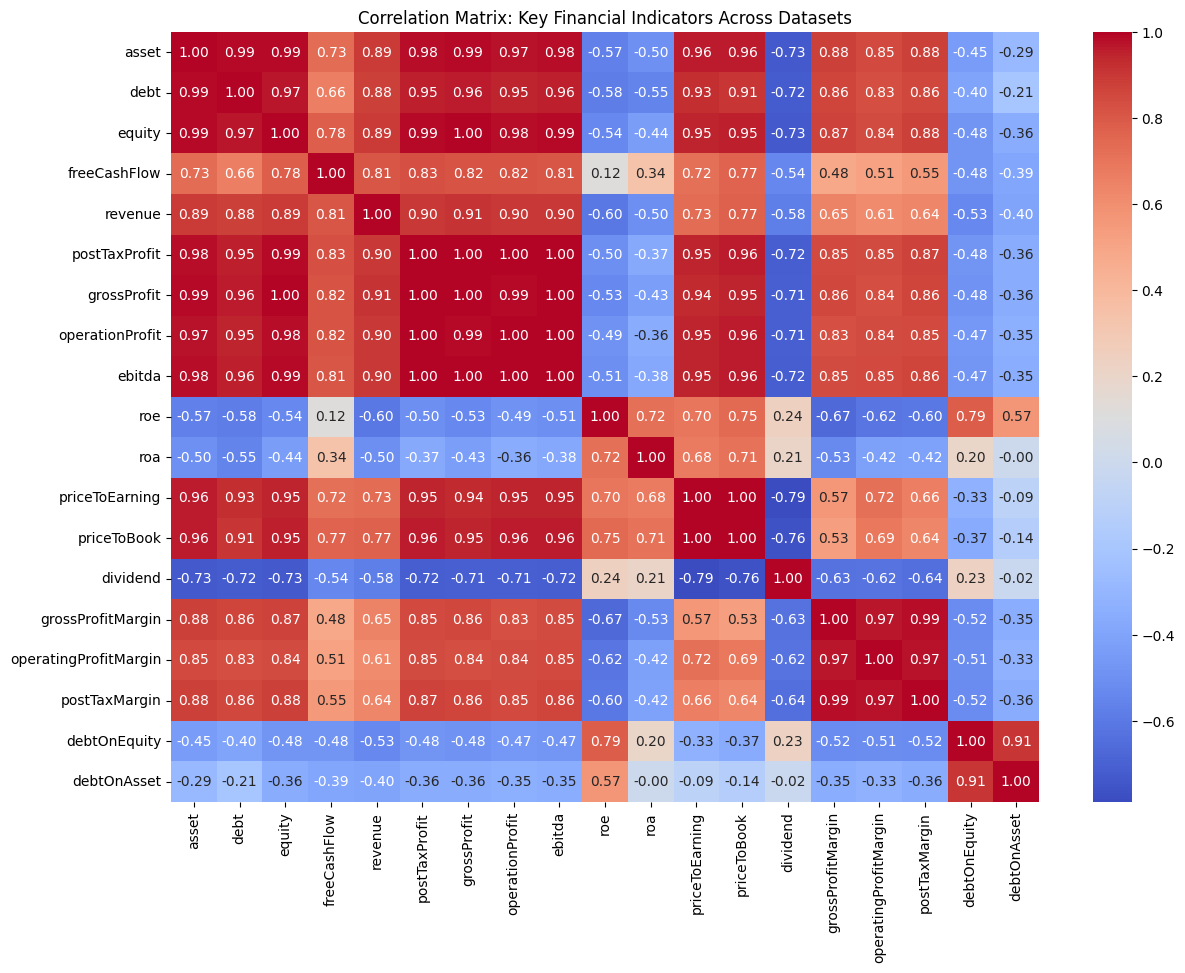

Top features most correlated with revenue:
grossProfit        0.911825
operationProfit    0.899273
ebitda             0.897309
postTaxProfit      0.895706
asset              0.891541
equity             0.888541
debt               0.876935
freeCashFlow       0.807188
priceToBook        0.772887
priceToEarning     0.728219
Name: revenue, dtype: float64

Linear Regression R^2 score (top correlated features): 0.8404342476736787


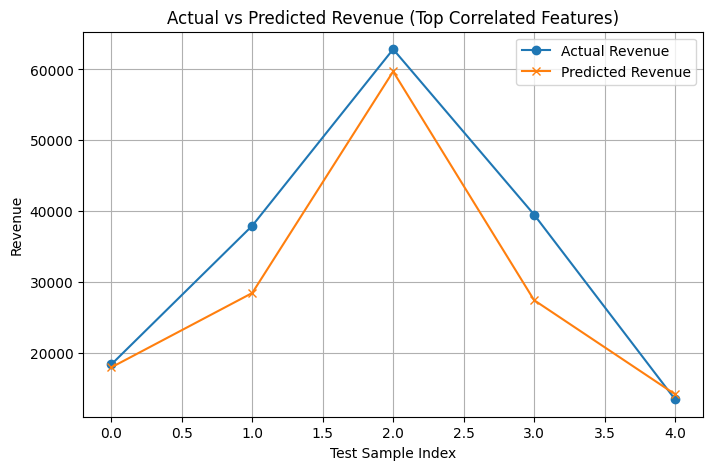

In [40]:
# Correlation Analysis: Examine relationships between key indicators from the four datasets
# (balancesheet, financialratio, incomestatement, cashflow)

# Select relevant numeric columns from each dataframe
financialratio_cols = ['roe', 'roa', 'priceToEarning', 'priceToBook', 'dividend', 'grossProfitMargin', 'operatingProfitMargin', 'postTaxMargin', 'debtOnEquity', 'debtOnAsset']
incomestatement_cols = ['revenue', 'postTaxProfit', 'grossProfit', 'operationProfit', 'ebitda']
balancesheet_cols = ['asset', 'debt', 'equity']
cashflow_cols = ['freeCashFlow']

# Merge all relevant columns on 'year'
df_corr = df_balancesheet[['year'] + balancesheet_cols].merge(
    df_cashflow[['year'] + cashflow_cols], on='year', how='left'
).merge(
    df_incomestatement[['year'] + incomestatement_cols], on='year', how='left'
).merge(
    df_financialratio_sorted[['year'] + financialratio_cols], on='year', how='left'
)

# Compute correlation matrix
corr_matrix = df_corr.drop(columns=['year']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Key Financial Indicators Across Datasets")
plt.show()

# Identify top features most correlated with revenue
corr_with_revenue = corr_matrix['revenue'].drop('revenue').sort_values(ascending=False)
print("Top features most correlated with revenue:")
print(corr_with_revenue.head(10))

# Optionally, build a simple linear regression model to predict revenue using top correlated features
top_features = corr_with_revenue.head(5).index.tolist()
X = df_corr[top_features]
y = df_corr['revenue']

# Drop rows with missing values
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

if len(X) > 5:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print("\nLinear Regression R^2 score (top correlated features):", lr.score(X_test, y_test))
    y_pred = lr.predict(X_test)

    # Plot actual vs predicted revenue
    plt.figure(figsize=(8, 5))
    plt.plot(y_test.values, label='Actual Revenue', marker='o')
    plt.plot(y_pred, label='Predicted Revenue', marker='x')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Revenue')
    plt.title('Actual vs Predicted Revenue (Top Correlated Features)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Not enough data for regression modeling.")

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Chọn các chỉ số tài chính có thể ảnh hưởng đến doanh thu
features = ['asset', 'debt', 'equity', 'freeCashFlow', 'postTaxProfit', 'roe', 'roa']
X = df_merged[features]
y = df_merged['revenue']

# Loại bỏ các dòng có giá trị NaN ở X hoặc y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_linear = lr.predict(X_test)
print("Linear Regression R^2 score:", lr.score(X_test, y_test))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression (deg=2) R^2 score:", lr_poly.score(X_test_poly, y_test_poly))

Linear Regression R^2 score: 0.6696470274820729
Polynomial Regression (deg=2) R^2 score: -5.159576034358357


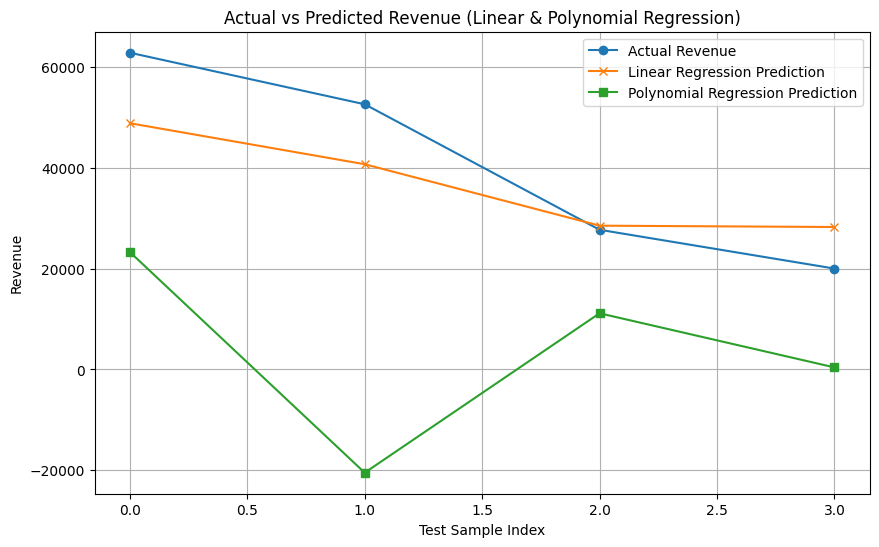

In [42]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted revenue for Linear and Polynomial Regression
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Revenue', marker='o')
plt.plot(y_pred_linear, label='Linear Regression Prediction', marker='x')
plt.plot(y_pred_poly, label='Polynomial Regression Prediction', marker='s')
plt.xlabel('Test Sample Index')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue (Linear & Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()